In [1]:
from GG_mthesis import *
# import metpy
# import metpy.calc as mpcalc
# from metpy.cbook import get_test_data
# from metpy.units import units
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\gian_\\repos\\mthesis_gianlucca'

## SOCAT

In [3]:
#df = pd.read_csv('data/01_raw/SOCATv2021_SouthernOceans.tsv', sep='\t', header=1232)

In [4]:
#df.to_csv('data/01_raw/dataset.csv')

In [2]:
from GG_mthesis.SOCAT_processing import SOCAT
df = SOCAT.read_dataset()

C:\Users\gian_\AppData\Local\Temp/ipykernel_23828/1022395331.py:2: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  df = SOCAT.read_dataset()


In [18]:
np.sort(df[df['QC_Flag'] == 'B']['yr'].unique())

array([1991, 1993, 1994, 1995, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020], dtype=int64)

In [12]:
np.sort(df['yr'].unique())

array([1957, 1961, 1962, 1963, 1968, 1969, 1978, 1979, 1983, 1984, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021], dtype=int64)

In [7]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
ax.scatter(df['lon'], df['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

In [3]:
df_sel = SOCAT.select_region(df, depth=500)
df_sel = SOCAT.SA_CT_rho(df_sel)

c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\SOCAT_processing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mm'][df['ss'] >= 60] = df['mm'][df['ss'] >= 60] + df['ss'][df['ss'] >= 60]/60
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\SOCAT_processing.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ss'][df['ss'] >= 60] = df['ss'][df['ss'] >= 60] - 60
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\SOCAT_processing.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [4]:
df_sel

,Expocode,QC_Flag,lon,lat,sample_depth [m],sal,T,Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],datetime,SA,CT,rho
0,069920201226,C,-66.22366,-55.72765,NaN,33.966,6.573,NaN,33.555,503.0,64.0,2021-01-05 05:26:00,34.126543,6.579399,1026.663106
1,069920201226,C,-66.21882,-55.72591,NaN,33.961,6.574,NaN,33.555,509.0,64.0,2021-01-05 05:27:00,34.121519,6.580468,1026.659032
2,069920201226,C,-66.21377,-55.72408,NaN,33.961,6.574,NaN,33.555,517.0,64.0,2021-01-05 05:28:00,34.121519,6.580468,1026.659032
3,069920201226,C,-66.20903,-55.72231,NaN,33.960,6.575,NaN,33.555,525.0,64.0,2021-01-05 05:29:00,34.120515,6.581482,1026.658111
4,069920201226,C,-66.20334,-55.72003,NaN,33.956,6.576,NaN,33.555,534.0,64.0,2021-01-05 05:30:00,34.116496,6.582537,1026.654825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456038,76XL20071224,C,-58.32940,-62.28050,NaN,33.981,3.360,3.88,35.000,808.0,19.0,2008-02-04 17:52:09,34.144981,3.364976,1027.042006
456039,76XL20071224,C,-58.56770,-62.32720,NaN,34.004,3.250,3.78,35.000,534.0,18.0,2008-02-04 18:24:29,34.168051,3.254744,1027.070621
456040,76XL20071224,C,-58.60630,-62.33520,NaN,34.004,3.230,3.76,35.000,597.0,19.0,2008-02-04 18:27:13,34.168045,3.234740,1027.072476
456041,76XL20071224,C,-58.62670,-62.33190,NaN,34.005,3.250,3.78,35.000,564.0,18.0,2008-02-04 18:29:37,34.169043,3.254735,1027.071408


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


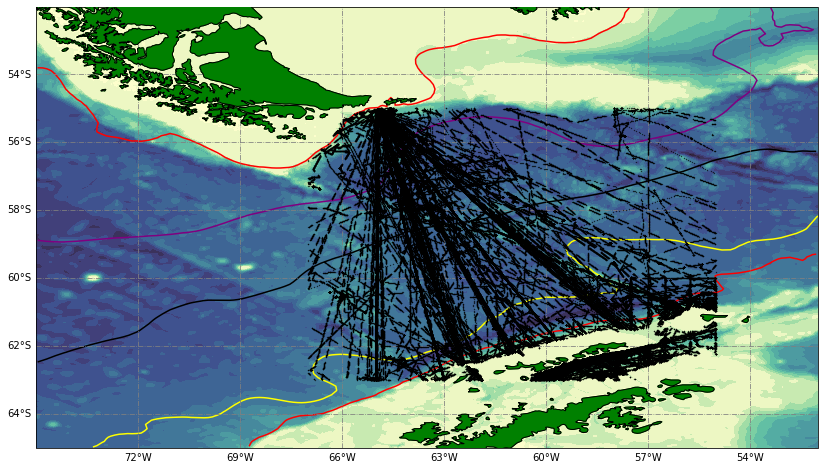

In [7]:
ax = rmap.plot_region()
ax.scatter(df_sel['lon'], df_sel['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

In [ ]:
#ds = df_sel.set_index('Expocode').to_xarray().set_coords(['longitude','latitude'])
#ds.where(ds['Expocode'] == '76XL20071224', drop=True)

In [ ]:
#pd.MultiIndex.from_arrays([df_sel['datetime'], df_sel['Expocode']], names=['datetime', 'cruise'])

In [ ]:
df_sel.sort_values('datetime').reset_index()

In [8]:
SOCAT.save_cruises_to_disc(df_sel)

In [ ]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
scat = ax.scatter(df_sel['lon'], df_sel['lat'], c=df_sel['datetime'], cmap='autumn', s=2)
cbar = plt.colorbar(scat, location='bottom', pad=0.05, ax=ax)
cbar.ax.set_xticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%r %d %b'), rotation=22.5)

In [ ]:
%%capture
from GG_mthesis.d01_data.processing import rmap 
import os
confirm = input("Type 'YES' if you are sure you want to continue, this will take a while")
if confirm == "YES":
    cruise_id = df_sel['Expocode'].unique()
    for i in range(len(cruise_id)):    
        path = os.path.abspath('results/SOCAT/preprocess')
        filename = path + '/' + str(cruise_id[i]) + '.png'
        if os.path.isfile(filename) == False:
            df_aux = df_sel[df_sel['Expocode'] == cruise_id[i]]
            ax = rmap.plot_region()
            scat = ax.scatter(df_aux['lon'], df_aux['lat'], c=df_aux['datetime'], cmap='autumn', s=2)
            cbar = plt.colorbar(scat, location='bottom', pad=0.05, ax=ax)
            cbar.ax.set_xticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%r %d %b'), rotation=22.5)
            plt.savefig(filename, format='png')
        else:
            continue
else:
    print('Think again')        
